In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv("datasets/Family Income and Expenditure.csv")
from sklearn.tree import plot_tree
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [59]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [60]:
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [61]:
df['Toilet Facilities'] = df['Toilet Facilities'].fillna('unaccounted')
df['Household Head Occupation'] = df['Household Head Occupation'].fillna('unaccounted')
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna('unaccounted')
df.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

<h1>Descriptive</h1>

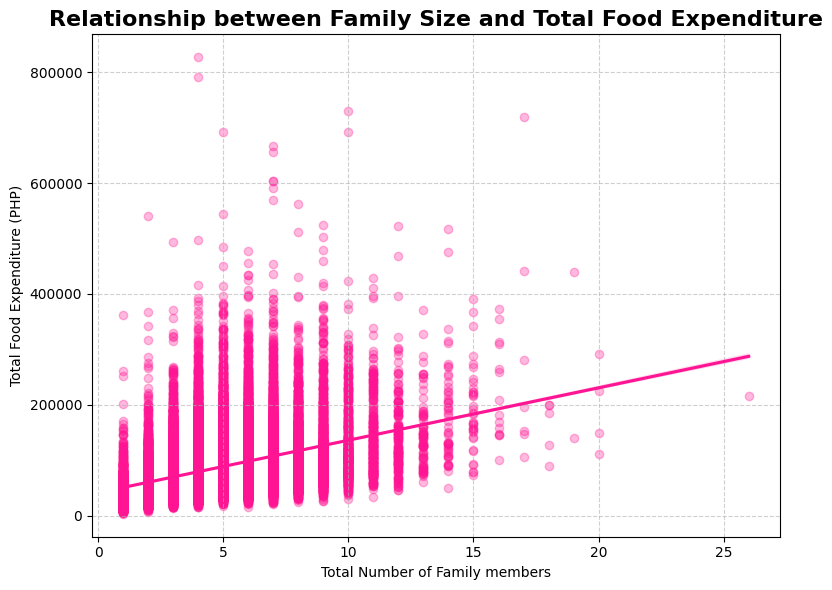

In [62]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Total Number of Family members',y='Total Food Expenditure',data=df,scatter_kws={'alpha': 0.3},color='deeppink')
plt.title('Relationship between Family Size and Total Food Expenditure',fontsize=16, fontweight='bold')
plt.xlabel('Total Number of Family members')
plt.ylabel('Total Food Expenditure (PHP)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

    INSIGHTS: The graph shows a clear positive correlation between Family Size and Total Food Expenditure.As the number of family members increases, the overall food cost generally rises. This makes sense, as more people simply require more food. However, the data points are quite scattered, indicating that family size is not the only factor at play. The significant variability suggests that other things like a family's spending habits, diet choices, or how frugally they shop like bulk buying also play a major role in the final grocery bill.

<hr>


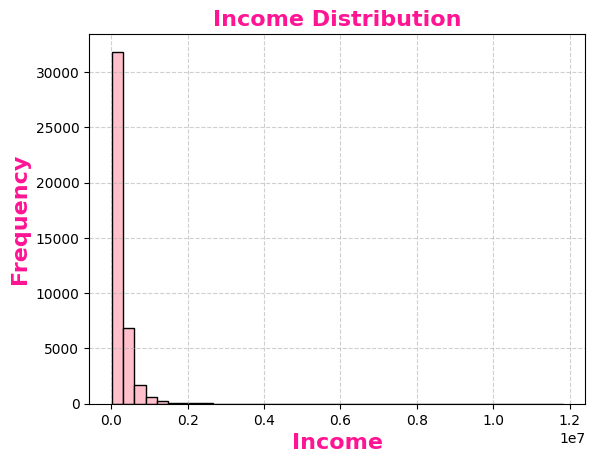

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

In [63]:
plt.hist(df["Total Household Income"], bins=40, color="pink", edgecolor="black")
plt.title("Income Distribution", color="deeppink", fontsize=16, fontweight='bold')
plt.xlabel("Income", color="deeppink", fontsize=16, fontweight='bold')
plt.ylabel("Frequency", color="deeppink", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

df["Total Household Income"].describe()

    INSIGHTS: The histogram shows dramatic income inequality. Visually, almost all households are crammed into the lowest income bracket. The overall average income is highly deceiving because a small percentage of extremely wealthy individuals are pulling that number way up. The reality for the common household is that their income is much closer to the lowest end of the scale.

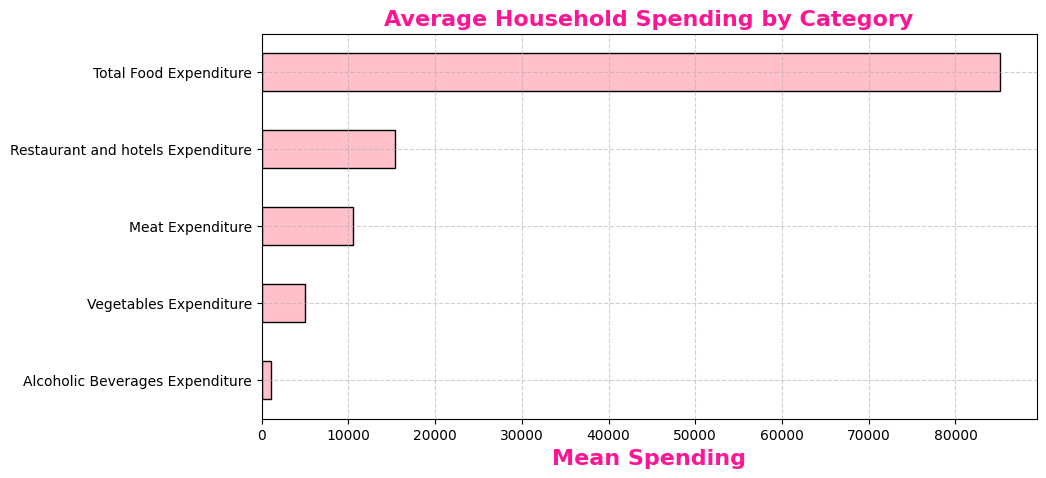

In [64]:
spending_cols = ["Total Food Expenditure", "Meat Expenditure", "Vegetables Expenditure","Restaurant and hotels Expenditure", "Alcoholic Beverages Expenditure"]
df[spending_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
df[spending_cols].mean().sort_values().plot(kind="barh", color="pink", edgecolor="black")
plt.title("Average Household Spending by Category", color="deeppink", fontsize=16, fontweight='bold')
plt.xlabel("Mean Spending", color="deeppink", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

    INSIGHTS: This bar chart makes it obvious where the household budget is being spent. Total Food Expenditure absolutely dominates the spending, standing head and shoulders above everything else. Spending on restaurants and hotels is the next biggest item, but it's a distant second.
    Look closer at the food breakdown, households are spending roughly twice as much on meat as they are on vegetables. Alcohol, meanwhile, barely registers on the chart. Essentially, households prioritize essentials like food and occasionally dining out over luxury items like drinks.

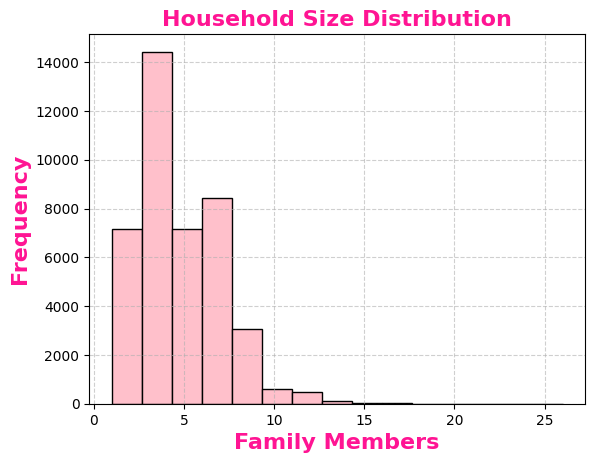

In [65]:
plt.hist(df["Total Number of Family members"], bins=15, color="pink", edgecolor="black")
plt.title("Household Size Distribution",  color="deeppink", fontsize=16, fontweight='bold')
plt.xlabel("Family Members", color="deeppink", fontsize=16, fontweight='bold')
plt.ylabel("Frequency", color="deeppink", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

    INSIGHTS: This chart gives us a clear look at the typical family. The overwhelming winner is the four member household, which is by far the most common family size in the data. While we see a lot of medium-sized families, the trend drops off fast. Essentially, most people live in small-to-medium-sized families, and households with 10 or more people are quite rare outliers.

<h1>Diagnostic<h1/>


 Correlation with Income:
 Total Household Income                           1.000000
Communication Expenditure                        0.710140
Housing and water Expenditure                    0.676186
Miscellaneous Goods and Services Expenditure     0.666288
Total Food Expenditure                           0.663660
Transportation Expenditure                       0.639939
Clothing, Footwear and Other Wear Expenditure    0.605992
Imputed House Rental Value                       0.574091
Meat Expenditure                                 0.567142
Total Income from Entrepreneurial Acitivites     0.563662
Name: Total Household Income, dtype: float64


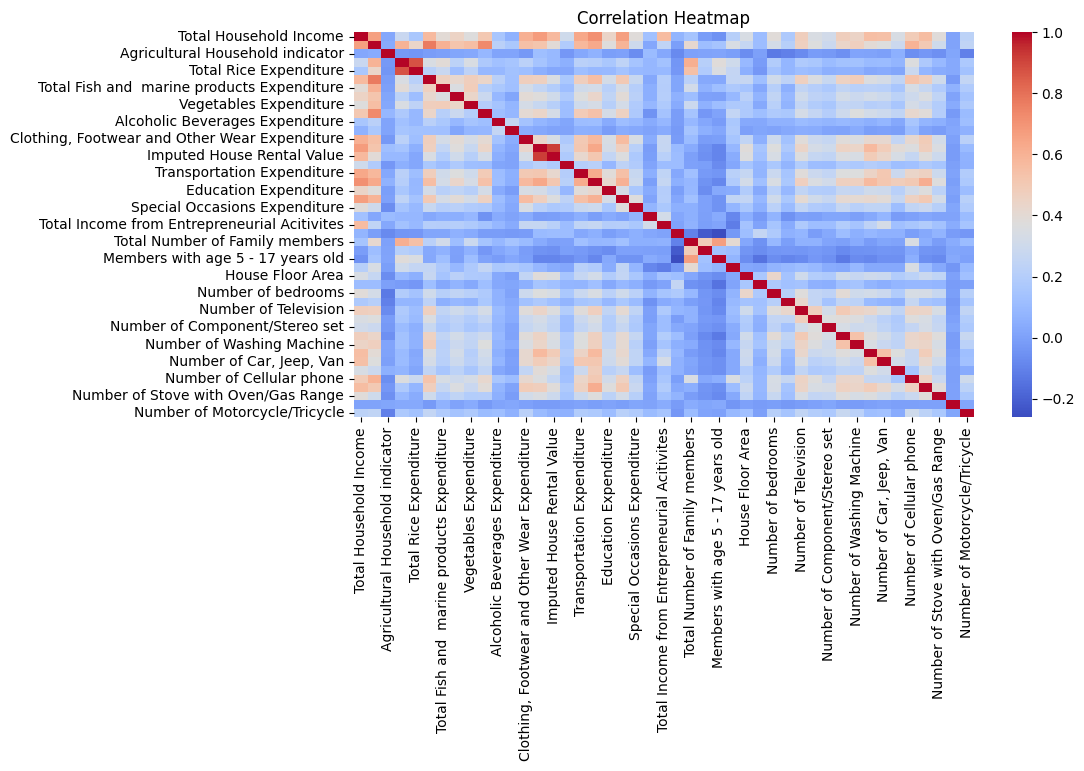

In [66]:
num_df = df.select_dtypes(include="number")
corr = num_df.corr()["Total Household Income"].sort_values(ascending=False)
print("\n Correlation with Income:\n", corr.head(10))

plt.figure(figsize=(10,5))
sns.heatmap(num_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print(f'')

    INSIGHTS: This heatmap reveals a clear pattern as a household's income goes up, their spending across almost every category rises significantly. The absolute strongest indicator of a household's wealth isn't food or luxury, but Communication Expenditure like phones, internet, and data. This is followed closely by essential costs like Housing and Water, showing that richer households prioritize connectivity and a secure home environment above everything else. In short, the higher the income, the more people spend on modern necessities and a better living setup.

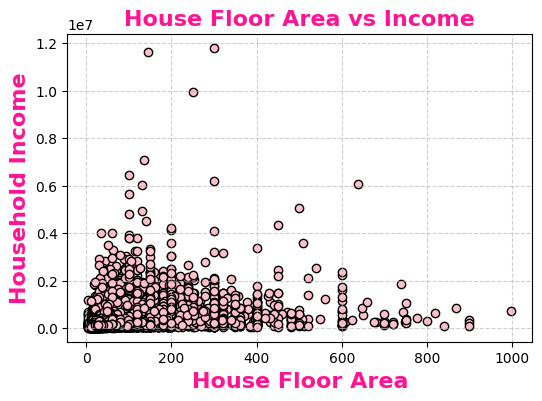

In [67]:
plt.figure(figsize=(6,4))
plt.scatter(df["House Floor Area"], df["Total Household Income"], color="pink", edgecolor="black")
plt.title("House Floor Area vs Income", color="deeppink", fontsize=16, fontweight='bold')
plt.xlabel("House Floor Area", color="deeppink", fontsize=16, fontweight='bold')
plt.ylabel("Household Income", color="deeppink", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

    INSIGHTS: This scatter plot shows that while having a larger house generally requires a higher income, the relationship isn't perfectly straight. The most noticeable feature is the huge cluster of dots in the bottom-left corner, which means the vast majority of people have low incomes and small house floor areas. However, you can’t have a massive income without a decent house size which is a no high-income dots below 100 units. But here's the twist, the households with the absolute highest incomes are not always the ones living in the very biggest houses, they tend to be in the medium-to-large house range, suggesting size isn't the only factor for the super-rich.

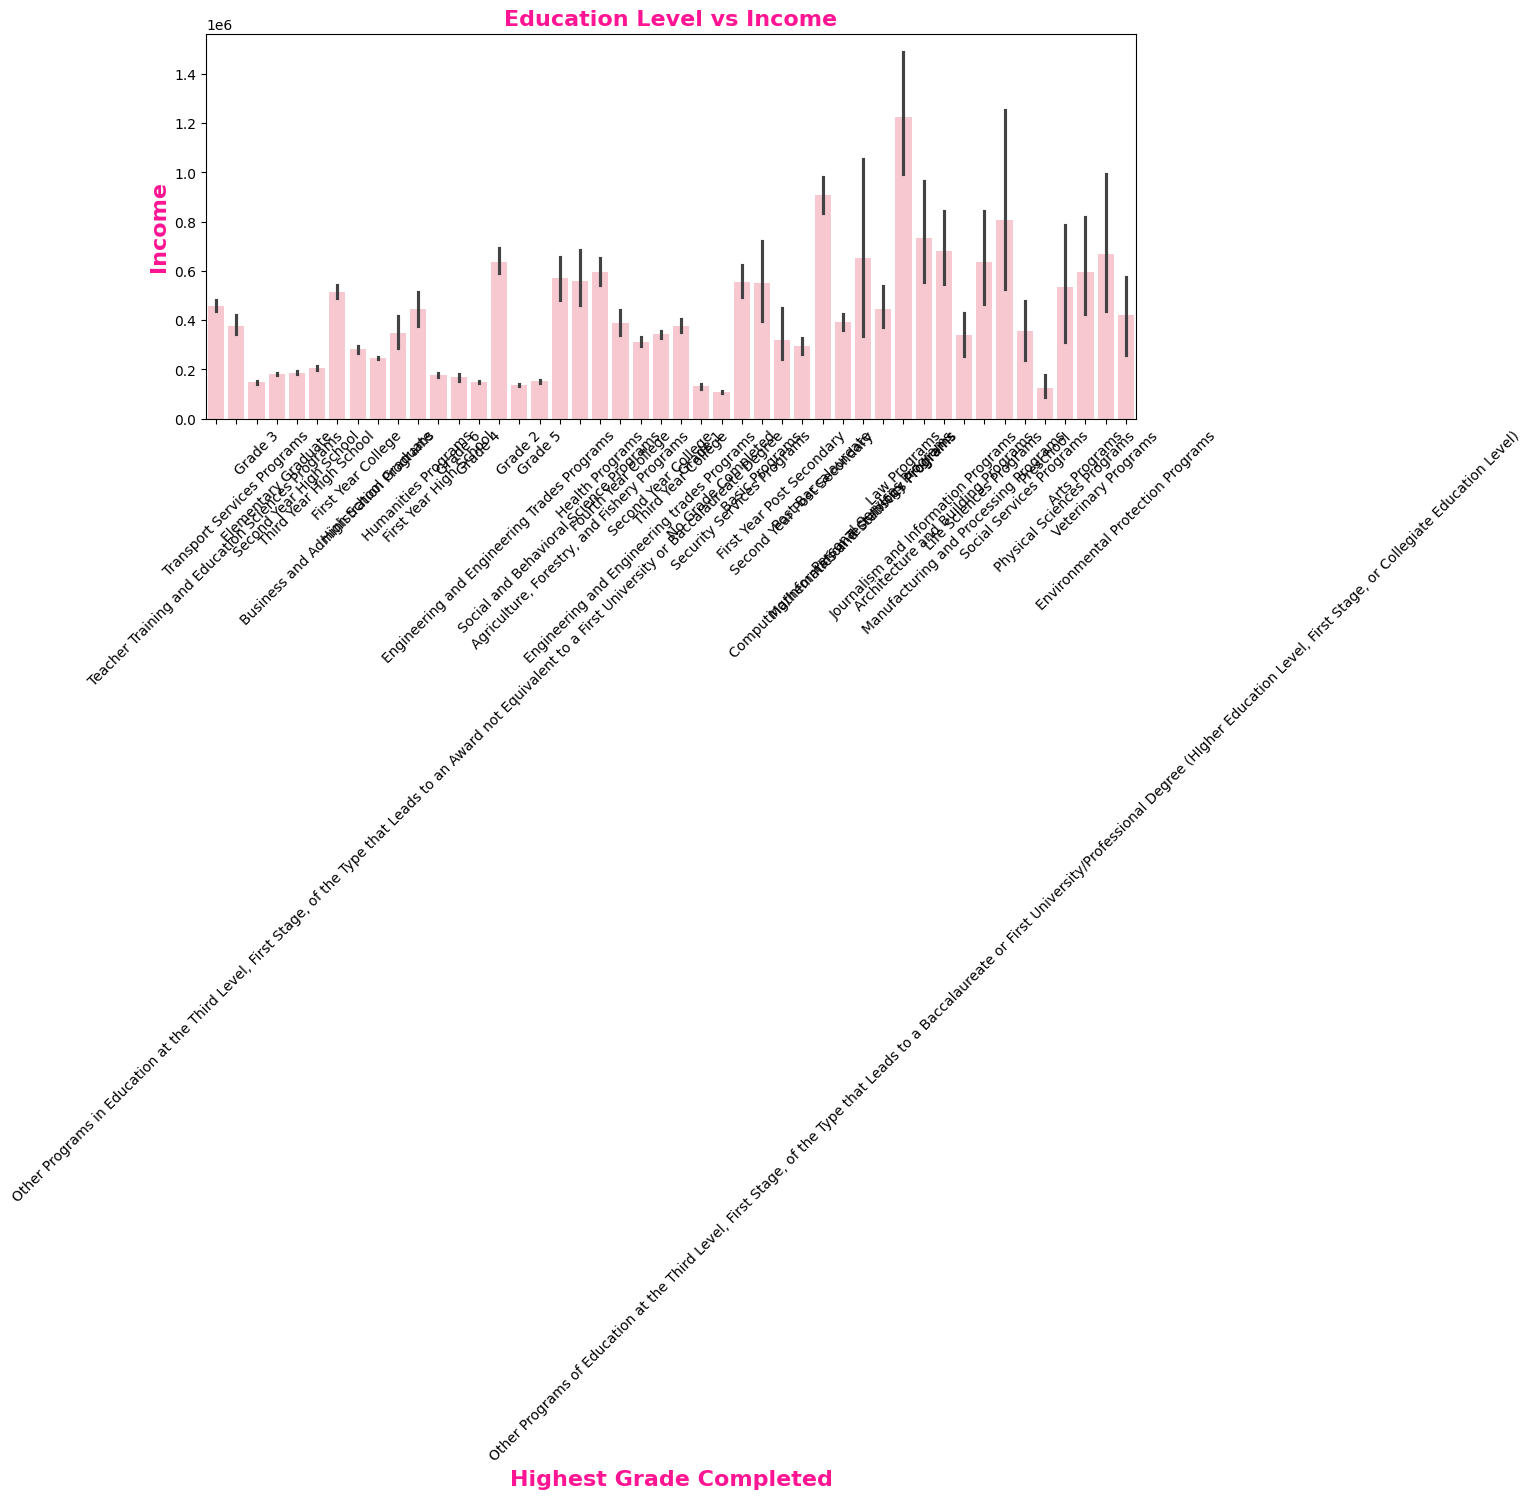

In [68]:
plt.figure(figsize=(12,5))
sns.barplot(x="Household Head Highest Grade Completed",y="Total Household Income",data=df,color="pink")
plt.xticks(rotation=45)
plt.title("Education Level vs Income", color="deeppink", fontsize=16, fontweight='bold')
plt.xlabel("Highest Grade Completed", color="deeppink", fontsize=16, fontweight='bold')
plt.ylabel("Income", color="deeppink", fontsize=16, fontweight='bold')
plt.show()

    INSIGHTS: This bar plot clearly shows that education generally pays off, with average income steadily climbing as people complete higher levels of schooling. The top earners are concentrated in specialized, high-demand fields like Law, Computer Science, and Engineering, which consistently offer the highest mean incomes. However, notice those long vertical lines above the bars for advanced degrees. This shows high risk and high reward. While these degrees offer the greatest potential for a high salary, the wide range of incomes means that even with a top degree, the actual paycheck you land is less predictable than those with lower education. Education unlocks the door, but it doesn't guarantee a seat at the highest table.

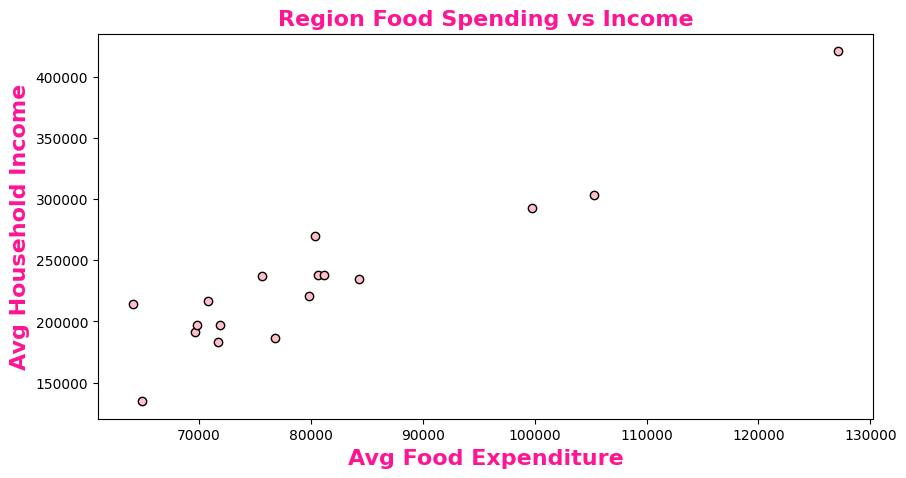

In [69]:
region_food = df.groupby("Region")["Total Food Expenditure"].mean()
region_income = df.groupby("Region")["Total Household Income"].mean()

plt.figure(figsize=(10,5))
plt.scatter(region_food, region_income, color="pink", edgecolor="black")
plt.title("Region Food Spending vs Income", color="deeppink", fontsize=16, fontweight='bold')
plt.xlabel("Avg Food Expenditure", color="deeppink", fontsize=16, fontweight='bold')
plt.ylabel("Avg Household Income", color="deeppink", fontsize=16, fontweight='bold')
plt.show()

    INSIGHTS: This plot shows an extremely clear and strong relationship when looking at data grouped by region, average food spending rises almost perfectly with average household income. Essentially, richer regions spend significantly more money on food than poorer regions. This connection is much tighter and more predictable on a regional level than it is for individual families. Notice the single dot on the far top-right. This represents one outlier region that is substantially wealthier and spends considerably more on food than every other region in the dataset.

<h1>Predict</h1>

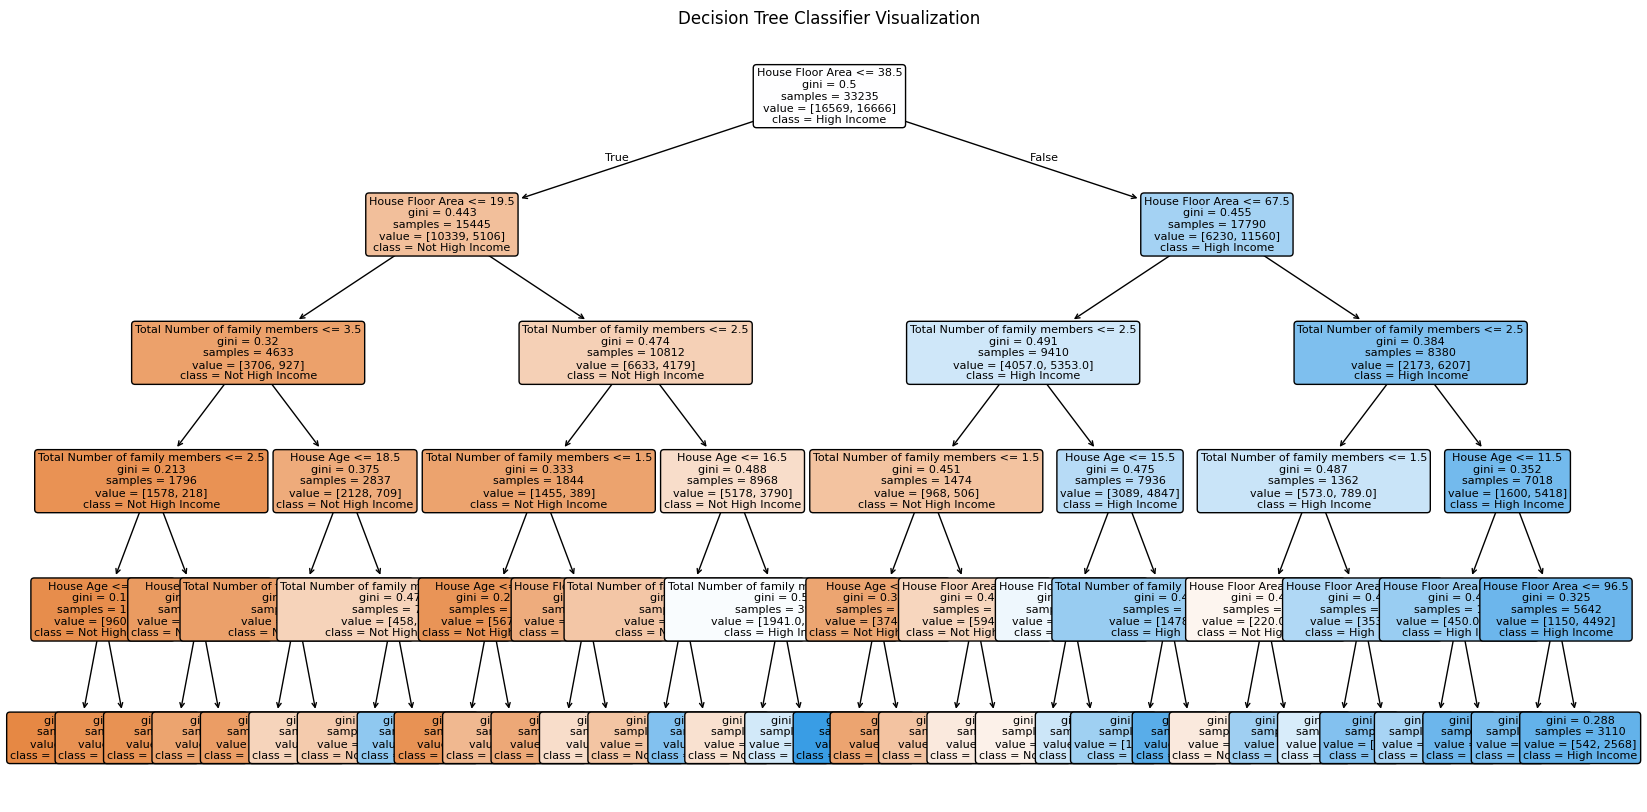

In [70]:
df["HighIncome"] = (df["Total Household Income"] > df["Total Household Income"].median()).astype(int)

clf_df = df[[
    "Total Number of Family members",
    "House Floor Area",
    "House Age",
    "HighIncome"
]].dropna()

X = clf_df.drop("HighIncome", axis=1)
y = clf_df["HighIncome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

feature_names = [
    "Total Number of family members",
    "House Floor Area",
    "House Age"
]

class_names = ["Not High Income", "High Income"] 

plt.figure(figsize=(20, 10))

plot_tree(
    tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=5
)

plt.title("Decision Tree Classifier Visualization")
plt.show()

    INSIGHTS: The Decision Tree Classifier reveals that House Floor Area is the single most distinguishing factor for predicting high income, acting as the primary split at the root of the tree (e.g., above or below 28.5 square units). The model then uses Total Number of Family Members and House Age to refine predictions within these large and small house groups. This hierarchical, rule-based system demonstrates that the combination of these three simple, non-financial features is sufficient to segment the data, but the relatively low overall accuracy (68.88%) suggests that while these features establish a baseline, they are not strong enough predictors on their own to consistently distinguish high-income households across all branches.

Model Accuracy Score: 0.6808 (approx. 68.08%)

## Classification Report
                     precision    recall  f1-score   support

Not High Income (0)       0.68      0.67      0.67      4115
    High Income (1)       0.68      0.69      0.69      4194

           accuracy                           0.68      8309
          macro avg       0.68      0.68      0.68      8309
       weighted avg       0.68      0.68      0.68      8309


## Confusion Matrix


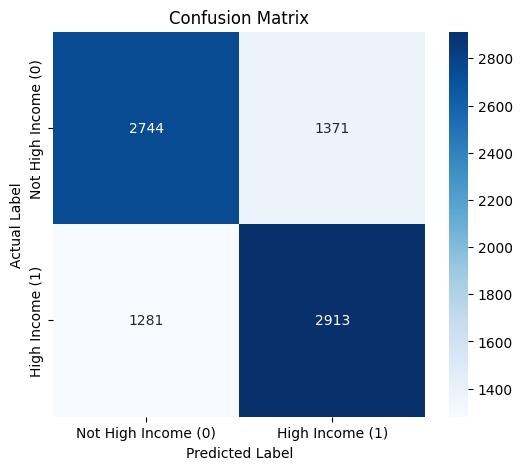

In [74]:
df["HighIncome"] = (df["Total Household Income"] > df["Total Household Income"].median()).astype(int)

feature_names = [
    "Total Number of Family members", 
    "House Floor Area",               
    "House Age"                       
]

clf_df = df[feature_names + ["HighIncome"]].dropna()

X = clf_df.drop("HighIncome", axis=1)
y = clf_df["HighIncome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

score = tree.score(X_test, y_test)
print(f"Model Accuracy Score: {score:.4f} (approx. {score * 100:.2f}%)")

y_pred = tree.predict(X_test)
class_names = ["Not High Income (0)", "High Income (1)"] 

print("\n## Classification Report")
print(classification_report(y_test, y_pred, target_names=class_names))

print("\n## Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print(df.columns.tolist())

    INSIGHTS: The model's evaluation shows that simple housing features (family size, floor area, and house age) are moderately predictive of high household income, achieving an accuracy of 68.88%. The Confusion Matrix reveals a balanced lack of precision, with the model making 1,371 False Positives (incorrectly flagging lower-income homes) and 1,281 False Negatives (missing actual high-income homes). While better than random, this indicates the features are insufficient for highly reliable classification, suggesting that crucial financial or socioeconomic variables are missing to effectively separate the two income groups.